In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Quality of Service 5G.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [4]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [5]:
df.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [6]:
df.shape

(400, 8)

In [7]:
#EXPLORATORY DATA ANALYSIS


In [8]:
df['Signal_Strength'] = df['Signal_Strength'].str.replace('dBm', '')

In [9]:
df['Minute']=pd.to_datetime(df["Timestamp"]).dt.minute

In [10]:
df['Latency'] = df['Latency'].str.replace('ms', '')

In [11]:
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace('Mbps', '').str.replace('Kbps','')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace('Mbps', '').str.replace('Kbps','')

In [12]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Minute
0,9/3/2023 10:00,User_1,Video_Call,-75,30,10,15,70%,0
1,9/3/2023 10:00,User_2,Voice_Call,-80,20,100,120,80%,0
2,9/3/2023 10:00,User_3,Streaming,-85,40,5,6,75%,0
3,9/3/2023 10:00,User_4,Emergency_Service,-70,10,1,1.5,90%,0
4,9/3/2023 10:00,User_5,Online_Gaming,-78,25,2,3,85%,0


In [13]:
df['Signal_Strength'] = pd.to_numeric(df['Signal_Strength'], errors='coerce', downcast='float')
df['Latency'] = pd.to_numeric(df['Latency'], errors='coerce', downcast='float')
df['Required_Bandwidth'] = pd.to_numeric(df['Required_Bandwidth'], errors='coerce', downcast='float')
df['Allocated_Bandwidth'] = pd.to_numeric(df['Allocated_Bandwidth'], errors='coerce', downcast='float')

In [14]:
App= df[['Application_Type']]

In [15]:
App= pd.get_dummies(App,prefix="AppType",dtype=int)

In [16]:
App.head()

,AppType_Background_Download,AppType_Emergency_Service,AppType_File_Download,AppType_IoT_Temperature,AppType_Online_Gaming,AppType_Streaming,AppType_Video_Call,AppType_Video_Streaming,AppType_VoIP_Call,AppType_Voice_Call,AppType_Web_Browsing
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [17]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Minute
0,9/3/2023 10:00,User_1,Video_Call,-75.0,30.0,10.0,15.0,70%,0
1,9/3/2023 10:00,User_2,Voice_Call,-80.0,20.0,100.0,120.0,80%,0
2,9/3/2023 10:00,User_3,Streaming,-85.0,40.0,5.0,6.0,75%,0
3,9/3/2023 10:00,User_4,Emergency_Service,-70.0,10.0,1.0,1.5,90%,0
4,9/3/2023 10:00,User_5,Online_Gaming,-78.0,25.0,2.0,3.0,85%,0


In [18]:
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').astype(float)

In [19]:
df.isna().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
Minute                 0
dtype: int64

In [20]:
df=df.drop('User_ID',axis=1)

In [21]:
df=df.drop('Timestamp',axis=1)

In [ ]:
df=df.drop('Application_Type',axis=1)

In [29]:
data=pd.concat([df,App],axis=1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Signal_Strength              400 non-null    float32
 1   Latency                      400 non-null    float32
 2   Required_Bandwidth           400 non-null    float32
 3   Allocated_Bandwidth          400 non-null    float32
 4   Resource_Allocation          400 non-null    float64
 5   Minute                       400 non-null    int32  
 6   AppType_Background_Download  400 non-null    int32  
 7   AppType_Emergency_Service    400 non-null    int32  
 8   AppType_File_Download        400 non-null    int32  
 9   AppType_IoT_Temperature      400 non-null    int32  
 10  AppType_Online_Gaming        400 non-null    int32  
 11  AppType_Streaming            400 non-null    int32  
 12  AppType_Video_Call           400 non-null    int32  
 13  AppType_Video_Stream

In [31]:
correlation_matrix = data.corr()

In [45]:
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

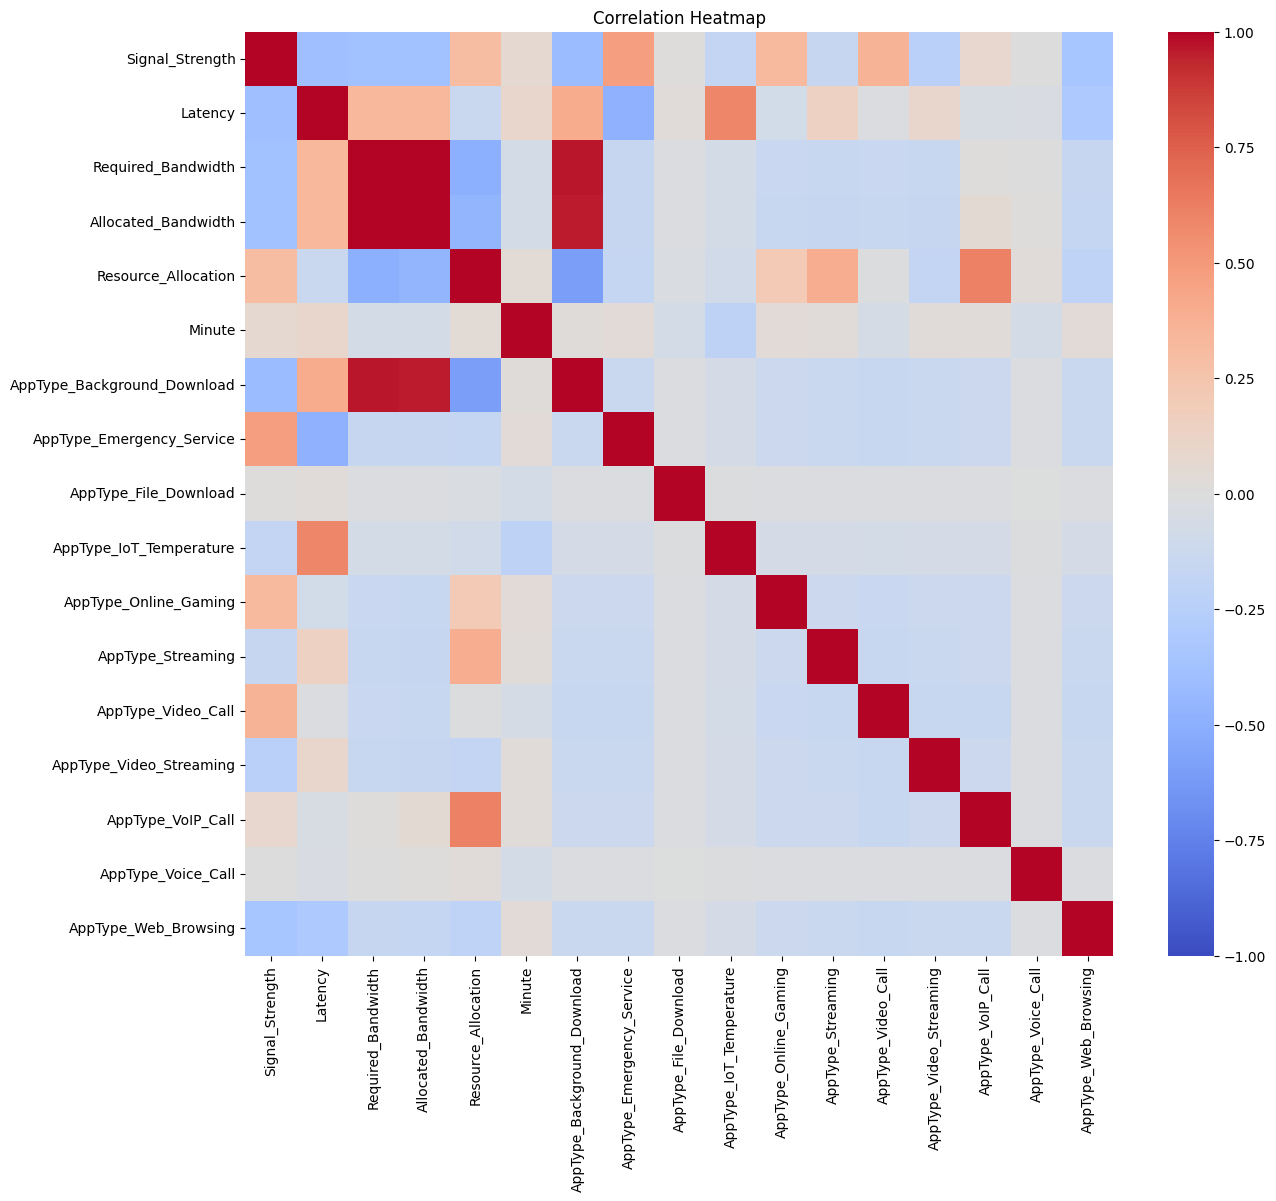

In [46]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Important feature using ExtratreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit()